In [1]:
# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is the comment dataframe. It holds two years worth of comments from NLSS episodes. 

In [3]:
comment_df = pd.read_pickle('Pipeline/comtok_df.pkl')

#comment_df['Tokens'] = comment_df['Comment'].apply(nltk.word_tokenize)

comment_df.head() 
comment_df.tail()
print(len(comment_df), 'comments')

,Date,User,Comment,Tokens
0,"August 24, 2017",Moobot,"Thank you for subbing, IHaveNoPokeClue! :D :D","[Thank, you, for, subbing, ,, IHaveNoPokeClue,..."
1,"August 24, 2017",emperorvespasian,VERY LARGE CONE,"[VERY, LARGE, CONE]"
2,"August 24, 2017",KhanWight,Kreygasm CLIMAX Kreygasm CLIMAX Kreygasm,"[Kreygasm, CLIMAX, Kreygasm, CLIMAX, Kreygasm]"
3,"August 24, 2017",Aheron211,VLC,[VLC]
4,"August 24, 2017",Nightbot,Necropara -> Squeal piggy! Squeal [stop spammi...,"[Necropara, -, >, Squeal, piggy, !, Squeal, [,..."


,Date,User,Comment,Tokens
4923013,"February 29, 2016",BlastrMaster,milwaukee HYPE,"[milwaukee, HYPE]"
4923014,"February 29, 2016",zapranoth,Dan is hosting the nlss while NL is gone,"[Dan, is, hosting, the, nlss, while, NL, is, g..."
4923015,"February 29, 2016",Supermaxman,Sure NL we all know you want the cheese,"[Sure, NL, we, all, know, you, want, the, cheese]"
4923016,"February 29, 2016",Bajur_sauce,have fun in Idaho,"[have, fun, in, Idaho]"
4923017,"February 29, 2016",anonymous_ax,just got here. what'd I miss?,"[just, got, here, ., what, 'd, I, miss, ?]"


4923018 comments


In [4]:
video_df = pd.read_pickle('Pipeline/combined.pkl')
video_df.head()
video_df.tail()
print(len(video_df), 'videos')

,Date,Crew,Docket,RowNum,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes
0,"August 24, 2017","[Northernlion, RockLeeSmile, CobaltStreak, Alp...","[Passpartout, Party Panic, Pinturillo]",18,2017-08-24 21:15:00.000,2017-08-25 00:15:00.000,5400,91,5751,4715,7.00,415.38,195
1,"August 23, 2017","[Northernlion, RockLeeSmile, LastGreyWolf, HCJ...","[Absolver, Golf It, Quiplash]",19,2017-08-23 21:15:00.000,2017-08-24 00:15:00.000,5962,170,6185,5214,13.08,458.62,195
2,"August 21, 2017","[Northernlion, RockLeeSmile, JSmithOTI, Alpaca...","[Fire Pro Wrestling World, Ultimate Chicken H...",21,2017-08-21 22:15:00.000,2017-08-22 01:15:00.000,5065,95,5347,4797,7.31,389.62,195
3,"August 17, 2017","[RockLeeSmile, LastGreyWolf, HCJustin, BaerTaf...","[Geoguessr, Golf It, Quiplash]",23,2017-08-17 21:15:00.000,2017-08-18 00:15:00.000,5365,108,6075,5214,8.31,412.69,195
4,"August 16, 2017","[Northernlion, BaerTaffy, LastGreyWolf, DanGhe...","[Nidhogg 2, Speedrunners, Pinturillo]",24,2017-08-16 21:15:00.000,2017-08-17 00:30:00.000,5823,116,5250,4681,8.29,415.93,210


,Date,Crew,Docket,RowNum,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes
194,"August 10, 2015","[Northernlion, RockLeeSmile, JSmithOTI]","[Rebirth, Nuclear Throne, OlliOlli 2: Olliwo...",429,2015-08-10 22:15:00.000,2015-08-11 01:00:00.000,6630,224,7333,6101,18.67,552.50,180
195,"July 30, 2015","[Northernlion, RockLeeSmile]","[Rebirth, Duck Game (continued), Speedrunners]",435,2015-07-30 22:15:00.000,2015-07-31 01:00:00.000,6798,146,5874,4860,12.17,566.50,180
196,"July 30, 2015","[Northernlion, RockLeeSmile]","[Rebirth, Duck Game (continued), Speedrunners]",436,2015-07-30 00:30:00.000,2015-07-30 01:00:00.000,1550,60,4227,3392,12.00,310.00,75
197,"July 29, 2015","[Northernlion, MathasGames, RockLeeSmile, Alpa...","[Rebirth & audio problems, Rocket League, Nu...",437,2015-07-29 22:15:00.000,2015-07-30 00:00:00.000,5050,169,4308,3749,15.36,459.09,165
198,"July 27, 2015","[Northernlion, RockLeeSmile, JSmithOTI]","[Rebirth, Nuclear Throne, Family Feud 2010 (...",438,2015-07-27 22:15:00.000,2015-07-28 01:00:00.000,8887,181,6658,5865,15.08,740.58,180


199 videos


The comments that I currently have available don't go as far back as my video stats do. Lets trim it to fit.

In [5]:
video_df.loc[video_df['Date'] == 'February 29, 2016']

,Date,Crew,Docket,RowNum,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes
138,"February 29, 2016","[Northernlion, RockLeeSmile, JSmithOTI, Alpaca...","[Afterbirth, Half Dead, Golf With Friends wi...",315,2016-02-29 23:15:00.000,2016-03-01 02:00:00.000,8679,106,7660,7164,8.83,723.25,180


In [6]:
temp_vid = video_df.loc[0:138]
temp_vid.head()
temp_vid.tail()

,Date,Crew,Docket,RowNum,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes
0,"August 24, 2017","[Northernlion, RockLeeSmile, CobaltStreak, Alp...","[Passpartout, Party Panic, Pinturillo]",18,2017-08-24 21:15:00.000,2017-08-25 00:15:00.000,5400,91,5751,4715,7.00,415.38,195
1,"August 23, 2017","[Northernlion, RockLeeSmile, LastGreyWolf, HCJ...","[Absolver, Golf It, Quiplash]",19,2017-08-23 21:15:00.000,2017-08-24 00:15:00.000,5962,170,6185,5214,13.08,458.62,195
2,"August 21, 2017","[Northernlion, RockLeeSmile, JSmithOTI, Alpaca...","[Fire Pro Wrestling World, Ultimate Chicken H...",21,2017-08-21 22:15:00.000,2017-08-22 01:15:00.000,5065,95,5347,4797,7.31,389.62,195
3,"August 17, 2017","[RockLeeSmile, LastGreyWolf, HCJustin, BaerTaf...","[Geoguessr, Golf It, Quiplash]",23,2017-08-17 21:15:00.000,2017-08-18 00:15:00.000,5365,108,6075,5214,8.31,412.69,195
4,"August 16, 2017","[Northernlion, BaerTaffy, LastGreyWolf, DanGhe...","[Nidhogg 2, Speedrunners, Pinturillo]",24,2017-08-16 21:15:00.000,2017-08-17 00:30:00.000,5823,116,5250,4681,8.29,415.93,210


,Date,Crew,Docket,RowNum,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes
134,"March 30, 2016","[Northernlion, RockLeeSmile, AlpacaPatrol, Cob...","[Afterbirth, Shellshock Live, Pinturillo 2]",308,2016-03-30 21:15:00.000,2016-03-31 00:00:00.000,9330,135,7226,6149,11.25,777.50,180
135,"March 28, 2016","[Northernlion, AlpacaPatrol, RockLeeSmile, MALF]","[Afterbirth, Space Food Truck, Shellshock Li...",309,2016-03-28 22:15:00.000,2016-03-29 01:15:00.000,10237,130,7401,6301,10.00,787.46,195
136,"March 24, 2016","[Northernlion, RockLeeSmile, LastGreyWolf]","[Afterbirth, The Culling, Golf with Friends]",311,2016-03-24 22:15:00.000,2016-03-25 01:00:00.000,9697,107,6804,5791,8.92,808.08,180
137,"March 23, 2016","[Northernlion, RockLeeSmile, AlpacaPatrol, Cob...","[Afterbirth, Enter the Gungeon, Shellshock L...",312,2016-03-23 21:15:00.000,2016-03-24 00:15:00.000,11778,173,6779,5778,13.31,906.00,195
138,"February 29, 2016","[Northernlion, RockLeeSmile, JSmithOTI, Alpaca...","[Afterbirth, Half Dead, Golf With Friends wi...",315,2016-02-29 23:15:00.000,2016-03-01 02:00:00.000,8679,106,7660,7164,8.83,723.25,180


# Comment Dataframe

In [7]:
comment_df.head()

,Date,User,Comment,Tokens
0,"August 24, 2017",Moobot,"Thank you for subbing, IHaveNoPokeClue! :D :D","[Thank, you, for, subbing, ,, IHaveNoPokeClue,..."
1,"August 24, 2017",emperorvespasian,VERY LARGE CONE,"[VERY, LARGE, CONE]"
2,"August 24, 2017",KhanWight,Kreygasm CLIMAX Kreygasm CLIMAX Kreygasm,"[Kreygasm, CLIMAX, Kreygasm, CLIMAX, Kreygasm]"
3,"August 24, 2017",Aheron211,VLC,[VLC]
4,"August 24, 2017",Nightbot,Necropara -> Squeal piggy! Squeal [stop spammi...,"[Necropara, -, >, Squeal, piggy, !, Squeal, [,..."


# Analysis

Let's look at the rates of the words 'love' and 'hate' in chat.

In [8]:
import re

In [9]:
#This format oversearches, e.g. 'whatever' contains 'hate'
hate_words = comment_df[comment_df['Comment'].str.contains('hate')]
love_words = comment_df[comment_df['Comment'].str.contains('love')]

In [10]:
len(love_words)
len(hate_words)

13908

8861

In [11]:
with open('PublicData/bad_words.txt') as f:
    bad_words = f.readlines()
    #Remove newline char
    bad_words = [x.strip() for x in bad_words] 
len(bad_words)

451

Is profanity more likely to occur with the words 'love' or 'hate'?

In [12]:
count = 0
for comment in hate_words['Tokens']:
    for word in comment:
        if word in bad_words:
            count+=1
print(count/len(hate_words['Comment'])*100, 'percent of words with \'hate\' contain curse words')

11.082270624083062 percent of words with 'hate' contain curse words


In [13]:
count = 0
for comment in love_words['Tokens']:
    for word in comment:
        if word in bad_words:
            count+=1
print(count/len(hate_words['Comment'])*100, 'percent of words with \'love\' contain curse words')

15.686717074822255 percent of words with 'love' contain curse words


Let's look at the most active users.

In [14]:
comment_df['User'].value_counts()

Nightbot              99774
Dr_Roc                29053
Moobot                27103
ShoresofSerenity      25651
luigimasta777         20301
TheDon_Corleone       18941
SpyroTheSheep         18666
id319                 17571
Eluc                  16235
machshop              15431
TheobromaCacao        15334
coosloos              15334
GodlyBurrito          15259
ArrestedHouse         14928
Ptrevordactyl         14169
wolfguy84             14109
juleskum17            13936
Noremac__             13601
charsept              13522
KaiserRolled          12768
Anakhronos            12751
zesty69pepper         12147
graysobstory          12044
Tr11ck                11779
volpescura            11752
Geavil                11325
emperorvespasian      11317
TheAzzaTom            11282
EggianoScumaldoo      11233
ops1197               10651
                      ...  
Darymorata                1
agnellorimbalzello        1
Carnover                  1
SpicyMexicanTaco          1
ICETREY27           

How many comments does a user put out on average?

In [15]:
print(len(comment_df['Comment'])/len(comment_df['User'].unique()), 'comments/user')

83.67498937707147 comments/user


In [16]:
len(comment_df.loc[comment_df['User']=='Sonofabrat'])

127

Some of the top commenters are moderators or tool bots. Ignoring these, what sorts of comments do they produce?

In [17]:
comment_df.loc[comment_df['User']=='Dr_Roc']

,Date,User,Comment,Tokens
102,"August 24, 2017",Dr_Roc,trash panda,"[trash, panda]"
276,"August 24, 2017",Dr_Roc,Put them in plastic bags,"[Put, them, in, plastic, bags]"
310,"August 24, 2017",Dr_Roc,I use them for small trash can bags,"[I, use, them, for, small, trash, can, bags]"
376,"August 24, 2017",Dr_Roc,LUL,[LUL]
456,"August 24, 2017",Dr_Roc,Daddy PP,"[Daddy, PP]"
800,"August 24, 2017",Dr_Roc,"""normal""","[``, normal, '']"
1191,"August 24, 2017",Dr_Roc,morning,[morning]
1236,"August 24, 2017",Dr_Roc,so never?,"[so, never, ?]"
1264,"August 24, 2017",Dr_Roc,rob...,"[rob, ...]"
1304,"August 24, 2017",Dr_Roc,I'm with you NL,"[I, 'm, with, you, NL]"


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [19]:
foo = []
for post in comment_df.loc[comment_df['User']=='Sonofabrat']['Comment']:
    sentiment = sid.polarity_scores(post)
    nonzero = False
    line = ""
    for k in sorted(sentiment):
        if k == 'compound' and sentiment[k] != 0.0:
            #print('\n'+post)
            nonzero = True
            line+=post+'\n'
        if nonzero:
            line+='{0}: {1}, '.format(k, sentiment[k])+'\n'
            #print('{0}: {1}, '.format(k, sentiment[k]), end='')
    if line != "":
        foo.append(line)

In [20]:
for line in foo[:10]:
    print(line)

The specials at the place I work at are often used to gauge interest in a dish. The best selling ones will sometimes make it to the menu.
compound: 0.802, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 

I AGREE
compound: 0.3612, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 

It's worth it since it kickstarted your career
compound: 0.2263, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 

I DEMAND TOWERS
compound: -0.128, 
neg: 0.6, 
neu: 0.4, 
pos: 0.0, 

Gunpowder or riot
compound: -0.5574, 
neg: 0.643, 
neu: 0.357, 
pos: 0.0, 

I love the zombie animation
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 

FAILURE HAS BEEN SENT
compound: -0.5106, 
neg: 0.524, 
neu: 0.476, 
pos: 0.0, 

Cornfessions of a Cereal Killer
compound: -0.6486, 
neg: 0.589, 
neu: 0.411, 
pos: 0.0, 

:) :) :) :)
compound: 0.9001, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 

Josh looks like a sheriff
compound: 0.3612, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 



In [21]:
comment_df.head()

,Date,User,Comment,Tokens
0,"August 24, 2017",Moobot,"Thank you for subbing, IHaveNoPokeClue! :D :D","[Thank, you, for, subbing, ,, IHaveNoPokeClue,..."
1,"August 24, 2017",emperorvespasian,VERY LARGE CONE,"[VERY, LARGE, CONE]"
2,"August 24, 2017",KhanWight,Kreygasm CLIMAX Kreygasm CLIMAX Kreygasm,"[Kreygasm, CLIMAX, Kreygasm, CLIMAX, Kreygasm]"
3,"August 24, 2017",Aheron211,VLC,[VLC]
4,"August 24, 2017",Nightbot,Necropara -> Squeal piggy! Squeal [stop spammi...,"[Necropara, -, >, Squeal, piggy, !, Squeal, [,..."


# Plan

Using machine learning, predict the percentage of positive/negative comments based on features like audience size, show hosts, games played.

Each comment has a compound score that represents an aggregate of its neg, neu, and pos scores. The negative numbers represent overwhelmingly negative comments, and positive numbers represent overwhelmingly positive comments.

As I want to predict the percentage of positive and negative comments overall, I will treat them as two descrete categories based on the compound score. 

In [22]:
#Holds sentiment values to add as column to df
sent_scores = []

#Iterate through every comment, exluding chat mod bots
for post in comment_df.loc[(comment_df['User']!='Moobot') & (comment_df['User']!='Nightbot')]['Comment']:
    #Use Vader to generate sentiment of the comment
    sentiment = sid.polarity_scores(post)
    nonzero = False

    for k in sorted(sentiment):
        #Ignore sentiment scores where the compound score is 0
        if k == 'compound' and sentiment[k] != 0.0:
            if sentiment[k]>0:
                sent_scores.append('pos')
            if sentiment[k]<0:
                sent_scores.append('neg')
        #If compound is 0 it is unkown, so denote it in the list
        elif k == 'compound' and sentiment[k] == 0.0:
            sent_scores.append('unk')

In [23]:
from collections import Counter
len(sent_scores)
len(comment_df.loc[(comment_df['User']!='Moobot') & (comment_df['User']!='Nightbot')]['Comment'])
Counter(sent_scores)

4796141

4796141

Counter({'neg': 625703, 'pos': 624560, 'unk': 3545878})

([<matplotlib.patches.Wedge at 0x133934675f8>,
  <matplotlib.text.Text at 0x13396bc46a0>])

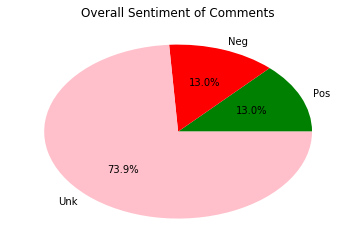

In [24]:
sent_labels = ['Pos', 'Neg', 'Unk']
plotcolors = ['green', 'red', 'pink']
counts = [624560, 625703, 3545878]

plt.pie(counts, labels = sent_labels, autopct='%1.1f%%', colors = plotcolors)
plt.title('Overall Sentiment of Comments')
plt.show()

If we ignore the unkown comments, we have a really nice split between positive and negative comments

In [25]:
ml_df = comment_df.loc[(comment_df['User']!='Moobot') & (comment_df['User']!='Nightbot')]
ml_df['Sentiment'] = sent_scores

C:\Users\sonofabrat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Although positive and negative comments are about equal in the entire corpus, it looks like they sometimes come clustered in large groups of negative or positive comments.

In [26]:
date_sentiment = {}
for date in ml_df['Date'].unique():
    temp_df = ml_df.loc[ml_df['Date']==date]
    length = len(temp_df.loc[temp_df['Sentiment']=='pos'])+len(temp_df.loc[temp_df['Sentiment']=='neg'])
    if length > 0:
        percent_pos = len(temp_df.loc[temp_df['Sentiment']=='pos'])/length
        percent_neg = len(temp_df.loc[temp_df['Sentiment']=='neg'])/length
        date_sentiment[date] = [percent_pos, percent_neg]
        #print(date, date_sentiment.get(date))

In [27]:
video_df.set_index('Date', inplace=True)
video_df.head()

,Crew,Docket,RowNum,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes
Date,,,,,,,,,,,,
"August 24, 2017","[Northernlion, RockLeeSmile, CobaltStreak, Alp...","[Passpartout, Party Panic, Pinturillo]",18,2017-08-24 21:15:00.000,2017-08-25 00:15:00.000,5400,91,5751,4715,7.00,415.38,195
"August 23, 2017","[Northernlion, RockLeeSmile, LastGreyWolf, HCJ...","[Absolver, Golf It, Quiplash]",19,2017-08-23 21:15:00.000,2017-08-24 00:15:00.000,5962,170,6185,5214,13.08,458.62,195
"August 21, 2017","[Northernlion, RockLeeSmile, JSmithOTI, Alpaca...","[Fire Pro Wrestling World, Ultimate Chicken H...",21,2017-08-21 22:15:00.000,2017-08-22 01:15:00.000,5065,95,5347,4797,7.31,389.62,195
"August 17, 2017","[RockLeeSmile, LastGreyWolf, HCJustin, BaerTaf...","[Geoguessr, Golf It, Quiplash]",23,2017-08-17 21:15:00.000,2017-08-18 00:15:00.000,5365,108,6075,5214,8.31,412.69,195
"August 16, 2017","[Northernlion, BaerTaffy, LastGreyWolf, DanGhe...","[Nidhogg 2, Speedrunners, Pinturillo]",24,2017-08-16 21:15:00.000,2017-08-17 00:30:00.000,5823,116,5250,4681,8.29,415.93,210


In [28]:
date_sentiment_df = pd.DataFrame.from_dict(date_sentiment, orient='index')
date_sentiment_df.columns = ['Pos', 'Neg']

date_sentiment_df.head()
date_sentiment_df.tail()
date_sentiment_df.describe()

,Pos,Neg
"August 24, 2017",0.553589,0.446411
"August 23, 2017",0.473054,0.526946
"August 21, 2017",0.495021,0.504979
"August 17, 2017",0.528835,0.471165
"August 16, 2017",0.518312,0.481688


,Pos,Neg
"March 24, 2016",0.525955,0.474045
"March 23, 2016",0.556821,0.443179
"March 04, 2016",0.486364,0.513636
"March 02, 2016",0.559082,0.440918
"February 29, 2016",0.566225,0.433775


,Pos,Neg
count,198.000000,198.000000
mean,0.501518,0.498482
std,0.035218,0.035218
min,0.415422,0.400804
25%,0.474983,0.471673
50%,0.502098,0.497902
75%,0.528327,0.525017
max,0.599196,0.584578


It seems sentiment rates range from 40-60% positive. This means a machine learning algorithm needs to predicts values in a 20% range.

In [109]:
result_df = pd.concat([video_df, date_sentiment_df], axis=1, join_axes=[video_df.index])
result_df.drop(['RowNum'], axis=1, inplace=True)
result_df.dropna(axis=0, how='any', inplace=True)
result_df.head()

,Crew,Docket,StartTime,EndTime,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour,LengthMinutes,Pos,Neg
Date,,,,,,,,,,,,,
"August 24, 2017","[Northernlion, RockLeeSmile, CobaltStreak, Alp...","[Passpartout, Party Panic, Pinturillo]",2017-08-24 21:15:00.000,2017-08-25 00:15:00.000,5400,91,5751,4715,7.00,415.38,195,0.553589,0.446411
"August 23, 2017","[Northernlion, RockLeeSmile, LastGreyWolf, HCJ...","[Absolver, Golf It, Quiplash]",2017-08-23 21:15:00.000,2017-08-24 00:15:00.000,5962,170,6185,5214,13.08,458.62,195,0.473054,0.526946
"August 21, 2017","[Northernlion, RockLeeSmile, JSmithOTI, Alpaca...","[Fire Pro Wrestling World, Ultimate Chicken H...",2017-08-21 22:15:00.000,2017-08-22 01:15:00.000,5065,95,5347,4797,7.31,389.62,195,0.495021,0.504979
"August 17, 2017","[RockLeeSmile, LastGreyWolf, HCJustin, BaerTaf...","[Geoguessr, Golf It, Quiplash]",2017-08-17 21:15:00.000,2017-08-18 00:15:00.000,5365,108,6075,5214,8.31,412.69,195,0.528835,0.471165
"August 16, 2017","[Northernlion, BaerTaffy, LastGreyWolf, DanGhe...","[Nidhogg 2, Speedrunners, Pinturillo]",2017-08-16 21:15:00.000,2017-08-17 00:30:00.000,5823,116,5250,4681,8.29,415.93,210,0.518312,0.481688


In [110]:
ml_df.head()

,Date,User,Comment,Tokens,Sentiment
1,"August 24, 2017",emperorvespasian,VERY LARGE CONE,"[VERY, LARGE, CONE]",unk
2,"August 24, 2017",KhanWight,Kreygasm CLIMAX Kreygasm CLIMAX Kreygasm,"[Kreygasm, CLIMAX, Kreygasm, CLIMAX, Kreygasm]",unk
3,"August 24, 2017",Aheron211,VLC,[VLC],unk
5,"August 24, 2017",T3chedOut,THE CONE,"[THE, CONE]",unk
6,"August 24, 2017",Newspire,DISRESPECT,[DISRESPECT],neg


Let's use a linear regression model to train our classifier.

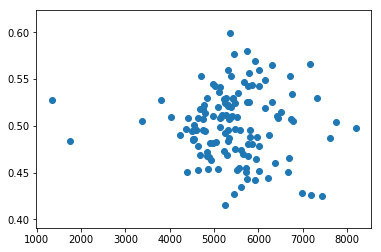

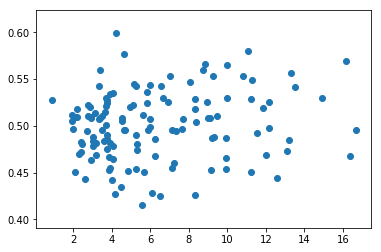

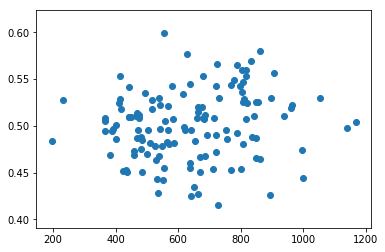

In [177]:
plt.scatter(result_df['AverageViewers'], result_df['Pos'])
plt.show()
plt.scatter(result_df['FollowersPerHour'], result_df['Pos'])
plt.show()
plt.scatter(result_df['ViewsPerHour'], result_df['Pos'])
plt.show()

In [112]:
#Features
X = result_df[['ViewsGained', 'FollowersGained', 'MaxViewers', 'AverageViewers', 'FollowersPerHour', 'ViewsPerHour']]
#Labels
y = result_df['Pos']

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
len(X_train)
len(X_test)

104

26

In [114]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [136]:
X_test[:10]
y_test[:10]
y_pred[:10]

print("Test           Pred           Diff")
for test, pred in zip(y_test, y_pred):
    if test>pred:
        text = 'under'
    else:
        text = 'over'
    print(test, pred, abs(test-pred), text)

,ViewsGained,FollowersGained,MaxViewers,AverageViewers,FollowersPerHour,ViewsPerHour
Date,,,,,,
"July 27, 2017",6059,200,5195,4586,16.67,504.92
"December 19, 2016",8928,100,6719,5713,7.14,637.71
"August 22, 2016",6387,31,6363,5737,2.58,532.25
"June 30, 2016",10426,129,6762,5089,9.92,802.00
"July 28, 2016",10519,105,6262,5672,8.08,809.15
"April 24, 2017",6649,47,6462,5559,3.92,554.08
"February 16, 2017",7441,32,6873,5859,2.46,572.38
"March 29, 2017",9369,31,5614,4850,2.38,720.69
"November 30, 2016",8142,54,5474,4406,4.50,678.50


Date
July 27, 2017        0.495663
December 19, 2016    0.455199
August 22, 2016      0.442713
June 30, 2016        0.454365
July 28, 2016        0.546434
April 24, 2017       0.455163
February 16, 2017    0.480923
March 29, 2017       0.471886
November 30, 2016    0.508249
May 17, 2017         0.513339
Name: Pos, dtype: float64

array([ 0.51483233,  0.50486971,  0.49220099,  0.50397026,  0.51822419,
        0.49086403,  0.49047691,  0.50934176,  0.50162318,  0.5032664 ])

Test           Pred           Diff
0.495663211339 0.514832326623 0.0191691152835 over
0.455199280791 0.504869710085 0.0496704292939 over
0.442713496672 0.492200993639 0.0494874969673 over
0.454365325077 0.50397025507 0.0496049299927 over
0.546433817529 0.518224191762 0.0282096257666 under
0.455163299981 0.490864031719 0.0357007317379 over
0.480923285811 0.490476914391 0.0095536285796 over
0.471885734948 0.509341756615 0.0374560216667 over
0.508249496982 0.501623184847 0.00662631213443 under
0.513338997451 0.503266404888 0.0100725925629 under
0.508834552918 0.496255266497 0.0125792864206 under
0.450234879624 0.503394161212 0.0531592815874 over
0.510439804531 0.500578870275 0.00986093425664 under
0.521962350257 0.52697450775 0.00501215749331 over
0.541790263479 0.506948652497 0.0348416109826 under
0.487673343606 0.486708789315 0.000964554290994 under
0.548908372013 0.502550555556 0.0463578164575 under
0.534774552193 0.498289974099 0.0364845780932 under
0.495020503808 0.501233516876 0.006

Try a different way

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

vectorizer = CountVectorizer()
result_df[['Docket']].head()
X = vectorizer.fit_transform(result_df[["Docket"]])
y = result_df['Pos']

,Docket
Date,
"August 24, 2017","[Passpartout, Party Panic, Pinturillo]"
"August 23, 2017","[Absolver, Golf It, Quiplash]"
"August 21, 2017","[Fire Pro Wrestling World, Ultimate Chicken H..."
"August 17, 2017","[Geoguessr, Golf It, Quiplash]"
"August 16, 2017","[Nidhogg 2, Speedrunners, Pinturillo]"


In [217]:
crew = pd.Series(result_df['Crew'])
crew_df = pd.get_dummies(crew.apply(pd.Series).stack()).sum(level=0)
crew_df.head()

,AlpacaPatrol,BaerTaffy,BananasaurusRex,CobaltStreak,Crendor,DanGheesling,HCJustin,JSmithOTI,LastGreyWolf,LovelyMomo,MALF,MathasGames,NOTREAL,Northernlion,RockLeeSmile,Sinvicta,TotalBiscuit
Date,,,,,,,,,,,,,,,,,
"April 11, 2016",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
"April 13, 2016",1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0
"April 14, 2016",1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
"April 18, 2016",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
"April 19, 2017",1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [236]:
crew

Date
August 24, 2017      [Northernlion, RockLeeSmile, CobaltStreak, Alp...
August 23, 2017      [Northernlion, RockLeeSmile, LastGreyWolf, HCJ...
August 21, 2017      [Northernlion, RockLeeSmile, JSmithOTI, Alpaca...
August 17, 2017      [RockLeeSmile, LastGreyWolf, HCJustin, BaerTaf...
August 16, 2017      [Northernlion, BaerTaffy, LastGreyWolf, DanGhe...
August 14, 2017      [Northernlion, JSmithOTI, MALF, HCJustin, Last...
August 10, 2017      [Northernlion, RockLeeSmile, AlpacaPatrol, Las...
July 31, 2017        [Northernlion, RockLeeSmile, JSmithOTI, BaerTa...
July 27, 2017         [Northernlion, RockLeeSmile, CobaltStreak, MALF]
July 26, 2017        [Northernlion, Sinvicta, BaerTaffy, DanGheesli...
July 20, 2017        [Northernlion, RockLeeSmile, CobaltStreak, Las...
July 19, 2017        [Northernlion, RockLeeSmile, AlpacaPatrol, Bae...
July 13, 2017        [Northernlion, RockLeeSmile, BaerTaffy, Alpaca...
July 12, 2017        [Northernlion, RockLeeSmile, AlpacaPatrol, Bae...
J

In [218]:
docket = pd.Series(result_df['Docket'])
docket_df = pd.get_dummies(docket.apply(pd.Series).stack()).sum(level=0)
docket_df.head()

,(aborted attempt to play Gang Beasts),Astroneer,Atlas Reactor,Ball 3D: Soccer Online,Battlegrounds,Ben & Edd Blood Party,Blood Party,Brawlhalla,Dark Souls 3,Dead By Daylight,...,Gungeon,Half Dead,Hitman,Nidhogg 2,Passpartout,Quiplash,Shadow Warrior 2,The End Is Nigh,Tricky Towers,Ultimate Chicken Horse
Date,,,,,,,,,,,,,,,,,,,,,
"April 11, 2016",0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
"April 13, 2016",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"April 14, 2016",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"April 18, 2016",0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
"April 19, 2017",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [233]:
X=crew_df
y=result_df['Pos']
len(X)
len(y)
X.head()
X.tail()

128

130

,AlpacaPatrol,BaerTaffy,BananasaurusRex,CobaltStreak,Crendor,DanGheesling,HCJustin,JSmithOTI,LastGreyWolf,LovelyMomo,MALF,MathasGames,NOTREAL,Northernlion,RockLeeSmile,Sinvicta,TotalBiscuit
Date,,,,,,,,,,,,,,,,,
"April 11, 2016",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
"April 13, 2016",1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0
"April 14, 2016",1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
"April 18, 2016",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
"April 19, 2017",1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


,AlpacaPatrol,BaerTaffy,BananasaurusRex,CobaltStreak,Crendor,DanGheesling,HCJustin,JSmithOTI,LastGreyWolf,LovelyMomo,MALF,MathasGames,NOTREAL,Northernlion,RockLeeSmile,Sinvicta,TotalBiscuit
Date,,,,,,,,,,,,,,,,,
"September 12, 2016",2,0,0,0,0,0,0,2,2,0,2,0,0,2,2,0,0
"September 22, 2016",1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0
"September 26, 2016",1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
"September 28, 2016",1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
"September 29, 2016",1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
